In [1]:
from load_trajectories import get_timestamps, load_trajectories
# Using the NPL 2024a kernel
import os
import os.path

#for calculating the air temperature
from metpy.units import units
from metpy.calc import temperature_from_potential_temperature

#time
from datetime import timedelta

import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 13.0.0. Please consider upgrading.
  warnings.warn(


# Folder 1 (using one netcdf file)

In [2]:
dirpath = "/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_sgs_1024_poly_trj_5400_7200"
fn = "cm1out_only_upto35.nc"
newncfilepath = os.path.join(dirpath, fn)
print(newncfilepath)

/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_sgs_1024_poly_trj_5400_7200/cm1out_only_upto35.nc


In [3]:
#Opened the netcdf files into a Dataset
nc = xr.open_dataset(newncfilepath)
nc

<xarray.Dataset>
Dimensions:   (one: 1, time: 105, ni: 120, nip1: 121, nj: 120, njp1: 121,
               nk: 140, nkp1: 141)
Coordinates:
  * time      (time) timedelta64[ns] 01:26:00 01:27:00 ... 02:10:00.000488281
Dimensions without coordinates: one, ni, nip1, nj, njp1, nk, nkp1
Data variables: (12/43)
    f_cor     (one) float32 ...
    ztop      (one) float32 ...
    xh        (ni) float32 ...
    xf        (nip1) float32 ...
    yh        (nj) float32 ...
    yf        (njp1) float32 ...
    ...        ...
    out10     (time, nk, nj, ni) float32 ...
    out11     (time, nk, nj, ni) float32 ...
    out12     (time, nk, nj, ni) float32 ...
    out13     (time, nk, nj, ni) float32 ...
    out14     (time, nk, nj, ni) float32 ...
    tke       (time, nkp1, nj, ni) float32 ...
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [1]:
#Calculating for relative humidity with respect to ice

#Coefficients of the polynomial expressions used to compute saturation vapor pressures
a0i = 6.11147274
a1i = 0.503160820
a2i = 0.188439774e-1
a3i = 0.420895665e-3
a4i = 0.615021634e-5
a5i = 0.602588177e-7
a6i = 0.385852041e-9
a7i = 0.146898966e-11
a8i = 0.252751365e-14



SyntaxError: invalid syntax (2725602907.py, line 2)

In [5]:
#Selecting a certain range of the z position
z_position = nc.where((nc['z'] >= 8) & (nc['z'] <= 10), drop = True)
z_position

<xarray.Dataset>
Dimensions:   (one: 1, nk: 20, ni: 120, nip1: 121, nj: 120, njp1: 121,
               nkp1: 141, time: 105)
Coordinates:
  * time      (time) timedelta64[ns] 01:26:00 01:27:00 ... 02:10:00.000488281
Dimensions without coordinates: one, nk, ni, nip1, nj, njp1, nkp1
Data variables: (12/43)
    f_cor     (one, nk) float32 7.599e-05 7.599e-05 ... 7.599e-05 7.599e-05
    ztop      (one, nk) float32 14.0 14.0 14.0 14.0 14.0 ... 14.0 14.0 14.0 14.0
    xh        (ni, nk) float32 0.05 0.05 0.05 0.05 ... 11.95 11.95 11.95 11.95
    xf        (nip1, nk) float32 0.0 0.0 0.0 0.0 0.0 ... 12.0 12.0 12.0 12.0
    yh        (nj, nk) float32 0.05 0.05 0.05 0.05 ... 11.95 11.95 11.95 11.95
    yf        (njp1, nk) float32 0.0 0.0 0.0 0.0 0.0 ... 12.0 12.0 12.0 12.0
    ...        ...
    out10     (time, nk, nj, ni) float32 0.0 0.0 0.0 ... 2.72e+05 0.0 1.709e+05
    out11     (time, nk, nj, ni) float32 0.0 0.0 0.0 ... 0.001086 0.0 0.002965
    out12     (time, nk, nj, ni) float32 0.0 0.0 0.0 0.0 ... 639.7 0.0 700.1
    out13     (time, nk, nj, ni) float32 0.0 0.0 0.0 0.0 ... 2.82 0.0 0.001381
    out14     (time, nk, nj, ni) float32 0.0 0.0 0.0 0.0 ... 2.82 0.0 0.001381
    tke       (time, nkp1, nj, ni, nk) float32 0.02112 0.02112 ... 0.0 0.0
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

(array([2.690000e+02, 1.722600e+04, 8.078400e+04, 1.115080e+05,
        1.177860e+05, 1.665410e+05, 1.841380e+05, 1.120110e+05,
        7.313600e+04, 1.097960e+05, 1.479480e+05, 1.833840e+05,
        2.122270e+05, 1.599420e+05, 8.103200e+04, 4.777300e+04,
        4.054300e+04, 4.040700e+04, 4.579500e+04, 5.707100e+04,
        7.606600e+04, 1.050650e+05, 1.478540e+05, 2.018710e+05,
        2.520170e+05, 2.683180e+05, 2.385460e+05, 1.855830e+05,
        1.445950e+05, 1.312240e+05, 1.336510e+05, 1.401570e+05,
        1.483580e+05, 1.609760e+05, 1.779120e+05, 2.088690e+05,
        2.564730e+05, 3.343590e+05, 4.792130e+05, 7.361940e+05,
        1.107814e+06, 1.332689e+06, 1.327391e+06, 1.340209e+06,
        1.416974e+06, 1.425795e+06, 1.248810e+06, 1.008220e+06,
        8.349080e+05, 7.278810e+05, 6.655590e+05, 6.286400e+05,
        6.344670e+05, 7.326660e+05, 8.732190e+05, 9.281090e+05,
        8.095560e+05, 6.085050e+05, 4.665020e+05, 3.862880e+05,
        3.300090e+05, 2.836900e+05, 2.43

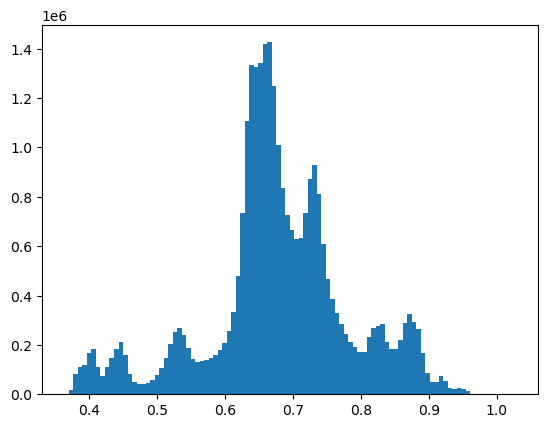

In [6]:
relative_humidity = z_position['rh'].values.flatten()
# relative_humidity.shape
plt.hist(relative_humidity, bins=100)

(array([9.8855880e+06, 4.9256400e+06, 3.0877200e+05, 2.2652490e+06,
        8.6750600e+05, 2.9152450e+06, 0.0000000e+00, 5.2735000e+04,
        1.4592650e+06, 0.0000000e+00, 0.0000000e+00, 1.5120000e+06,
        0.0000000e+00, 1.8591440e+06, 1.1648560e+06, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.3912880e+06, 1.2071200e+05, 0.0000000e+00,
        0.0000000e+00, 1.8800000e+02, 3.0430000e+03, 1.6012000e+04,
        4.6567000e+04, 1.0247300e+05, 2.4287400e+05, 6.7187700e+05,
        1.5845310e+06, 3.2755140e+06, 1.3173338e+07, 9.3017230e+06,
        1.4767295e+07, 1.0767267e+07, 8.1500770e+06, 1.4238623e+07,
        1.1152415e+07, 8.0282740e+06, 2.8716970e+06, 2.3969810e+06,
        4.2466430e+06, 2.7408220e+06, 3.1593400e+06, 3.2803440e+06,
        3.1008720e+06, 3.2273380e+06, 3.3770650e+06, 3.3549380e+06,
        3.4703410e+06, 4.1856840e+06, 3.0576830e+06, 2.9863030e+06,
        3.3866110e+06, 3.1536570e+06, 2.0832450e

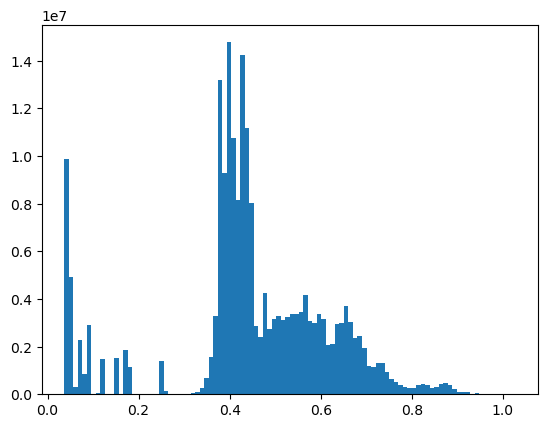

In [16]:
relative_humidity = nc['rh'].values.flatten()
# relative_humidity.shape
plt.hist(relative_humidity, bins=100)

In [22]:
(nc['xf'].values) * 1000
#xf = x position of the edges
#yf = y position of the edges
#xh = x position of the midpoint
#yh = y position of the midpoint

array([    0.     ,   100.     ,   200.     ,   300.     ,   400.     ,
         500.     ,   600.     ,   700.00006,   800.     ,   900.00006,
        1000.     ,  1100.     ,  1200.     ,  1300.0001 ,  1400.0001 ,
        1500.0001 ,  1600.     ,  1700.     ,  1800.0001 ,  1900.0001 ,
        2000.     ,  2100.0002 ,  2200.     ,  2300.0002 ,  2400.     ,
        2500.     ,  2600.0002 ,  2700.     ,  2800.0002 ,  2900.     ,
        3000.0002 ,  3100.0002 ,  3200.     ,  3300.0002 ,  3400.     ,
        3500.0002 ,  3600.0002 ,  3700.0002 ,  3800.0002 ,  3900.     ,
        4000.     ,  4100.0005 ,  4200.0005 ,  4300.     ,  4400.     ,
        4500.     ,  4600.0005 ,  4700.0005 ,  4800.     ,  4900.     ,
        5000.     ,  5100.0005 ,  5200.0005 ,  5300.     ,  5400.     ,
        5500.0005 ,  5600.0005 ,  5700.0005 ,  5800.     ,  5900.     ,
        6000.0005 ,  6100.0005 ,  6200.0005 ,  6300.     ,  6400.     ,
        6500.0005 ,  6600.0005 ,  6700.0005 ,  6800.     ,  6900

In [5]:
#Creating a DataArray object of the time
# time_coords = (nc['time'].values) / 1e9

time_coords = nc['time'].values / np.timedelta64(1, 's')
time_coords.astype(np.int32)

array([5160, 5220, 5280, 5340, 5400, 5460, 5520, 5580, 5640, 5700, 5760,
       5820, 5880, 5940, 6000, 6060, 6120, 6180, 6240, 6300, 6360, 6420,
       6480, 6540, 6600, 6660, 6720, 6780, 6840, 6900, 6960, 7020, 7080,
       7140, 7200, 3660, 3720, 3780, 3840, 3900, 3960, 4020, 4080, 4140,
       4200, 4260, 4320, 4380, 4440, 4500, 4560, 4620, 4680, 4740, 4800,
       4860, 4920, 4980, 5040, 5100, 5160, 5220, 5280, 5340, 5400, 5460,
       5520, 5580, 5640, 5700, 5760, 5820, 5880, 5940, 6000, 6060, 6120,
       6180, 6240, 6300, 6360, 6420, 6480, 6540, 6600, 6660, 6720, 6780,
       6840, 6900, 6960, 7020, 7080, 7140, 7200, 7260, 7320, 7380, 7440,
       7500, 7560, 7620, 7680, 7740, 7800], dtype=int32)

In [6]:
#Selecting certain data variables
selected_vars = ['rh', 'th', 'prs', 'uinterp', 'vinterp', 'winterp', 'out8', 'out9', 'out10', 'out11', 'out12', 'out13', 'out14', 'deactrat']
selected_data = nc[selected_vars]
selected_data

<xarray.Dataset>
Dimensions:   (time: 105, nk: 140, nj: 120, ni: 120)
Coordinates:
  * time      (time) timedelta64[ns] 01:26:00 01:27:00 ... 02:10:00.000488281
Dimensions without coordinates: nk, nj, ni
Data variables: (12/14)
    rh        (time, nk, nj, ni) float32 ...
    th        (time, nk, nj, ni) float32 ...
    prs       (time, nk, nj, ni) float32 ...
    uinterp   (time, nk, nj, ni) float32 ...
    vinterp   (time, nk, nj, ni) float32 ...
    winterp   (time, nk, nj, ni) float32 ...
    ...        ...
    out10     (time, nk, nj, ni) float32 ...
    out11     (time, nk, nj, ni) float32 ...
    out12     (time, nk, nj, ni) float32 ...
    out13     (time, nk, nj, ni) float32 ...
    out14     (time, nk, nj, ni) float32 ...
    deactrat  (time, nk, nj, ni) float32 ...
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [9]:
# adding variable example
#concantenate into int
selected_data['time_seconds'] = nc['time'].values / np.timedelta64(1, 's')
selected_data['time_seconds'] = selected_data['time_seconds'].astype(np.int32)
selected_data
#selected_data['time_seconds'] = (nc['time'].values) / 1e9 
# selected_data

<xarray.Dataset>
Dimensions:       (time: 105, nk: 140, nj: 120, ni: 120, time_seconds: 105)
Coordinates:
  * time          (time) timedelta64[ns] 01:26:00 ... 02:10:00.000488281
  * time_seconds  (time_seconds) int32 5160 5220 5280 5340 ... 7680 7740 7800
Dimensions without coordinates: nk, nj, ni
Data variables: (12/15)
    rh            (time, nk, nj, ni) float32 ...
    th            (time, nk, nj, ni) float32 ...
    prs           (time, nk, nj, ni) float32 1.014e+05 1.014e+05 ... 1.484e+04
    uinterp       (time, nk, nj, ni) float32 ...
    vinterp       (time, nk, nj, ni) float32 ...
    winterp       (time, nk, nj, ni) float32 ...
    ...            ...
    out11         (time, nk, nj, ni) float32 ...
    out12         (time, nk, nj, ni) float32 ...
    out13         (time, nk, nj, ni) float32 ...
    out14         (time, nk, nj, ni) float32 ...
    deactrat      (time, nk, nj, ni) float32 ...
    air_temp      (time, nk, nj, ni) float64 294.8 294.7 294.7 ... 211.7 211.7
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [ ]:
# #Converting a data set to a dataframe & renaming the column names
# df = selected_data.to_dataframe()
# renamed_table = df.rename(columns={
#     'rh': 'Relative Humidity',
#     'th': 'Potential Temperature (K)',
#     'prs': 'Pressure (pa)',
#     'uinterp': 'U Interpolated to Scalar Points (Velocity Field)',
#     'vinterp': 'V Interpolated to Scalar Points (Velocity Field)',
#     'winterp': 'W Interpolated to Scalar Points (Velocity Field)',
#     'out8': 'out8: mean size in um (a)',
#     'out9': 'out9: mean size in um (c)',
#     'out10': 'out10: ice number mixing ratio (#/kg)',
#     'out11': 'out11: mean settling velocity (m/s)',
#     'out12': 'out12: mean ice density (kg/m^3)',
#     'out13': 'out13: standard deviation of size in um (a_std)',
#     'out14': 'out14: standard deviation of size in um (c_std)',
#     'deactrat': 'deactrat: mean deposition/sublimation rate (kg/kg/s)',
#     }
# )
# df_indexed = renamed_table.reset_index()
# df_indexed

# #.astype (convert float to int)

In [ ]:
# #adding a column for temperature (calculating from potential temperature)
# potential_temp = selected_data['th'].values * units.kelvin
# pressure = (selected_data['prs'].values / 100) * units.hPa
# selected_data['air_temp'] = temperature_from_potential_temperature(pressure, potential_temp)
# selected_data

In [10]:
selected_data['air_temp'] = selected_data['th'] * (selected_data['prs'] / 101325) ** .286
selected_data

<xarray.Dataset>
Dimensions:       (time: 105, nk: 140, nj: 120, ni: 120, time_seconds: 105)
Coordinates:
  * time          (time) timedelta64[ns] 01:26:00 ... 02:10:00.000488281
  * time_seconds  (time_seconds) int32 5160 5220 5280 5340 ... 7680 7740 7800
Dimensions without coordinates: nk, nj, ni
Data variables: (12/15)
    rh            (time, nk, nj, ni) float32 ...
    th            (time, nk, nj, ni) float32 ...
    prs           (time, nk, nj, ni) float32 1.014e+05 1.014e+05 ... 1.484e+04
    uinterp       (time, nk, nj, ni) float32 ...
    vinterp       (time, nk, nj, ni) float32 ...
    winterp       (time, nk, nj, ni) float32 ...
    ...            ...
    out11         (time, nk, nj, ni) float32 ...
    out12         (time, nk, nj, ni) float32 ...
    out13         (time, nk, nj, ni) float32 ...
    out14         (time, nk, nj, ni) float32 ...
    deactrat      (time, nk, nj, ni) float32 ...
    air_temp      (time, nk, nj, ni) float64 294.8 294.7 294.7 ... 211.7 211.7
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [21]:
time = selected_data['time_seconds'].values
sorted_time = time

#size of the numpy array without unique
(np.sort(sorted_time)).size #105

#size of numpy array with unique times
(np.unique(np.sort(sorted_time))).size #70

70

In [ ]:
#Checks if the velocity fields are different

#renamed_table['out8: mean size in um (a)'].values
#renamed_table['out9: mean size in um (c)'].values
np.unique(df_indexed['out10: ice number mixing ratio (#/kg)'].values)
# renamed_table['out11: mean settling velocity (m/s)'].values
# renamed_table['out12: mean ice density (kg/m^3)'].values
# renamed_table['out13: standard deviation of size in um (a_std)'].values
# renamed_table['out14: standard deviation of size in um (c_std)'].values

# Folder 1 (another cdf file for comparison)

In [ ]:
path1 = '/glade/derecho/scratch/joko/outsdm_iceball_nowind_rhod_dist_min200_sgs_1024_poly'
fn1 = "cm1out.nc"
path1file = os.path.join(path1, fn1)

path2 = '/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_sgs_1024_poly_trj_5400_7200'
fn2 = "cm1out_only_upto35.nc"
path2file = os.path.join(path2, fn2)

ds1 = xr.open_dataset(path1file)
ds2 = xr.open_dataset(path2file)

In [ ]:
# get the intersection of two datasets, on time dimension
ds2 = ds2.drop_duplicates(dim='time', keep='first') # drop duplicate time steps, keep the first instance

In [ ]:
time_idx = np.isin(ds1.time, ds2.time) # get indices where timestamps of ds1 are in timestamps of ds2

In [ ]:
ds1 = ds1.sel(time=time_idx, drop=True) # get subset based on timestamps
ds2 = ds2.sortby('time') # sort by timestamps

if ds1['time'].equals(ds2['time']):
    print('timestamps match')
else:
    print('timestamps do not match')
var = 'out8' # variable to compare
if ds1[var].equals(ds2[var]):
    print(f'Data match for variable {var}')
else:
    print(f'Data do NOT match for variable {var}')